**IN-CLASS SESSION WORK**

**COVID-19 Analysis With Python**

Python is a highly powerful general-purpose programming language that can be easily learned and provides data scientists a wide variety of tools and packages. Amid this pandemic period, you are to analyze this novel coronavirus.
You are to do the following:

1.	Gathering Data  
2.	Transforming Data to our needs (Data Wrangling)
3.	Exploratory Data Analysis (EDA) and Visualization

You can find the data on the website here: https://coronavirus-disasterresponse.hub.arcgis.com/datasets/bbb2e4f589ba40d692fab712ae37b9ac_1/geoservice?geometry=169.709%2C-38.069%2C-152.322%2C63.033 or 

use this: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

As part of the EDA, you are to do the following: 

**Part 1 — Ranking Most affected countries**

i) Top 10 Confirmed Cases Countries:

ii) Top 10 Death Cases Countries:

iii) Top 10 Recovered Cases Countries:

iv) Top 10 Active Cases Countries:

**Part 2 — Ranking most affected States is largely affected Countries:**

EDA for ranking states in largely affected Countries:

i) Most affected States in the USA:

ii) Most affected States in Brazil:

iii) Most affected States in India:

iv) Most affected States in Russia:

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the data
data = pd.read_csv("Coronavirus_COVID-19_Cases.csv")
data.head()

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key
0,67.709953,33.93911,1,NaN,Afghanistan,2020/09/05 09:28:32+00,33.93911,67.709953,38324,30082,1409,6833,NaN,NaN,Afghanistan
1,20.168300,41.15330,2,NaN,Albania,2020/09/05 09:28:32+00,41.15330,20.168300,9967,5882,306,3779,NaN,NaN,Albania
2,1.659600,28.03390,3,NaN,Algeria,2020/09/05 09:28:32+00,28.03390,1.659600,45773,32259,1539,11975,NaN,NaN,Algeria
3,1.521800,42.50630,4,NaN,Andorra,2020/09/05 09:28:32+00,42.50630,1.521800,1215,928,53,234,NaN,NaN,Andorra
4,17.873900,-11.20270,5,NaN,Angola,2020/09/05 09:28:32+00,-11.20270,17.873900,2876,1167,115,1594,NaN,NaN,Angola


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 15 columns):
X                 731 non-null float64
Y                 731 non-null float64
OBJECTID          744 non-null int64
Province_State    576 non-null object
Country_Region    744 non-null object
Last_Update       744 non-null object
Lat               731 non-null float64
Long_             731 non-null float64
Confirmed         744 non-null int64
Recovered         744 non-null int64
Deaths            744 non-null int64
Active            744 non-null int64
Admin2            0 non-null float64
FIPS              52 non-null float64
Combined_Key      744 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 87.3+ KB


In [4]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Admin2',
       'FIPS', 'Combined_Key'],
      dtype='object')

In [5]:
#creating a new dataframe for the columns needed
covid_df = data[['Province_State', 'Country_Region','Confirmed', 'Recovered', 'Deaths', 'Active']]
covid_df.head(10)

,Province_State,Country_Region,Confirmed,Recovered,Deaths,Active
0,NaN,Afghanistan,38324,30082,1409,6833
1,NaN,Albania,9967,5882,306,3779
2,NaN,Algeria,45773,32259,1539,11975
3,NaN,Andorra,1215,928,53,234
4,NaN,Angola,2876,1167,115,1594
5,NaN,Antigua and Barbuda,95,91,3,1
6,NaN,Argentina,461882,331621,9623,120638
7,NaN,Armenia,44649,39823,895,3931
8,Australian Capital Territory,Australia,113,110,3,0
9,New South Wales,Australia,4104,2994,52,1058


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 6 columns):
Province_State    576 non-null object
Country_Region    744 non-null object
Confirmed         744 non-null int64
Recovered         744 non-null int64
Deaths            744 non-null int64
Active            744 non-null int64
dtypes: int64(4), object(2)
memory usage: 35.0+ KB


### Top 10 most affected Countries by Cases

In [7]:
top_cases = covid_df.groupby("Country_Region")["Confirmed"].sum().sort_values(ascending=False).head(10)
top_cases

Country_Region
US              6202080
Brazil          4091801
India           4023179
Russia          1017131
Peru             676848
Colombia         650055
South Africa     635078
Mexico           623090
Spain            498989
Argentina        461882
Name: Confirmed, dtype: int64

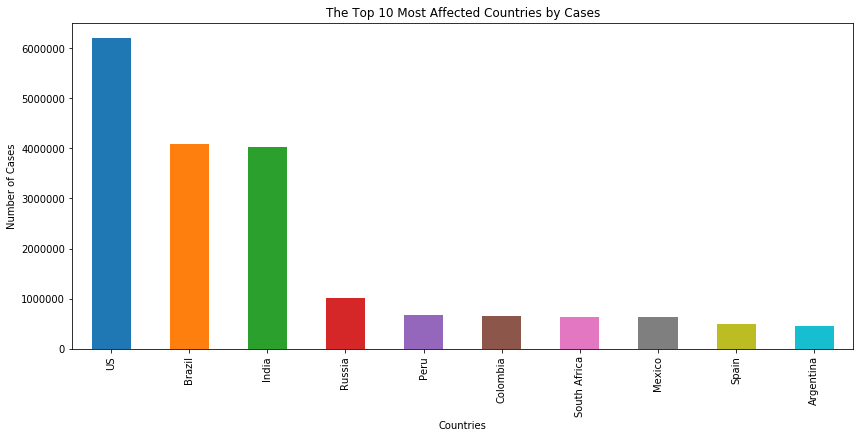

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

top_cases.plot.bar()

# Creates labels
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Cases')
# Sets the plot title
ax.set_title("The Top 10 Most Affected Countries by Cases")
plt.savefig('Number_Cases.png', dpi=300, bbox_inches='tight')
plt.show()

The above graph shows the top 10 countries globally that confirmed the most cases of COVID-19. The US recorded about 6.2 Million cases followed by Brazil (4.1 M), India (4.0 M) and Russia (1.0 M). Argentina being the 10th country in rank recorded 461, 882 cases

### Top 10 most affected Countries by Death


In [9]:
top_deaths = covid_df.groupby("Country_Region")["Deaths"].sum().sort_values(ascending=False).head(10)
top_deaths

Country_Region
US                187768
Brazil            125502
India              69561
Mexico             66851
United Kingdom     41626
Italy              35518
France             30730
Peru               29554
Spain              29418
Iran               22044
Name: Deaths, dtype: int64

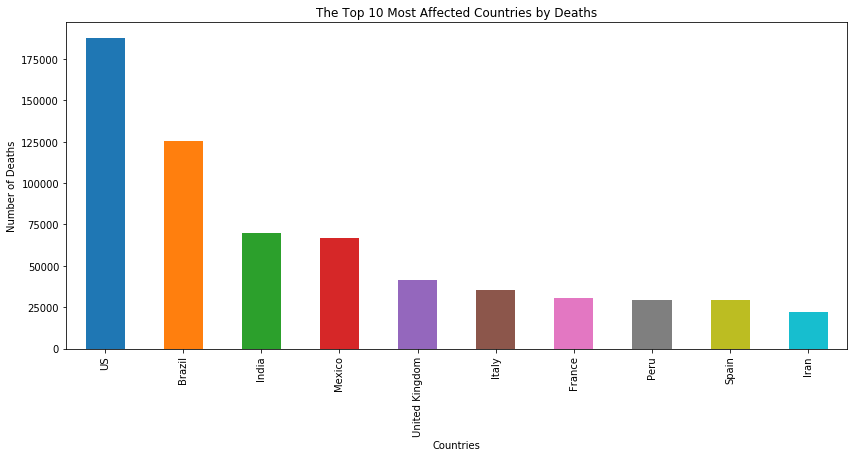

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

top_deaths.plot.bar()

# Creates labels
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Deaths')
# Sets the plot title
ax.set_title("The Top 10 Most Affected Countries by Deaths")
plt.savefig('Deaths.png', dpi=300, bbox_inches='tight')
plt.show()

The countries which recorded the most deaths resulting from COVID-19 are US (187,768), Brazil (125,502), India (69,561), Mexico (66,851) and the United Kingdom (41,626).

### Top 10 Countries with most Recovered cases

In [11]:
top_recover = covid_df.groupby("Country_Region")["Recovered"].sum().sort_values(ascending=False).head(10)
top_recover

Country_Region
Brazil          3464278
India           3107223
US              2283454
Russia           835884
South Africa     557818
Mexico           514663
Peru             498523
Colombia         498165
Chile            391248
Argentina        331621
Name: Recovered, dtype: int64

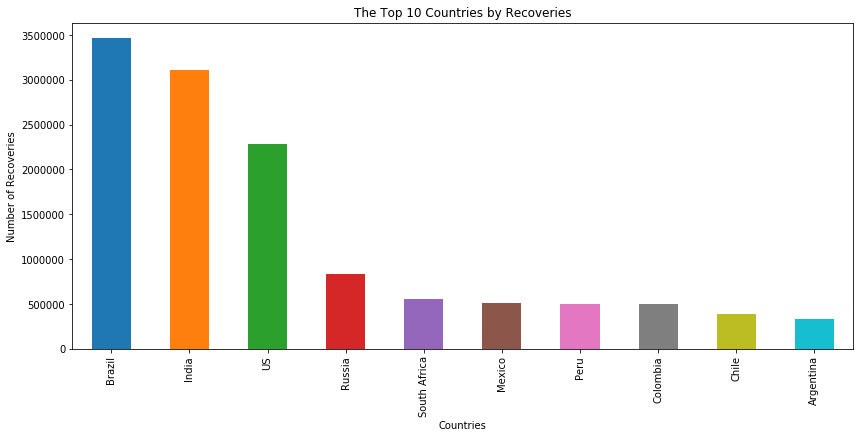

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))

top_recover.plot.bar()

# Creates labels
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Recoveries')
# Sets the plot title
ax.set_title("The Top 10 Countries by Recoveries")
plt.savefig('Recoveries.png', dpi=300, bbox_inches='tight')
plt.show()

From the figure above, Brazil (3.4 M), India (3.1 M) and the US (2.2 M) have recorded high number of recoveries due to COVID-19 among the top 10 recoveries by countries.

### Top 10 Countries with most Active Cases

In [13]:
top_act_cases = covid_df.groupby("Country_Region")["Active"].sum().sort_values(ascending=False).head(10)
top_act_cases

Country_Region
US                3730854
India              846395
Brazil             502021
Spain              319195
United Kingdom     301304
France             228610
Russia             163540
Peru               148771
Colombia           130950
Argentina          120638
Name: Active, dtype: int64

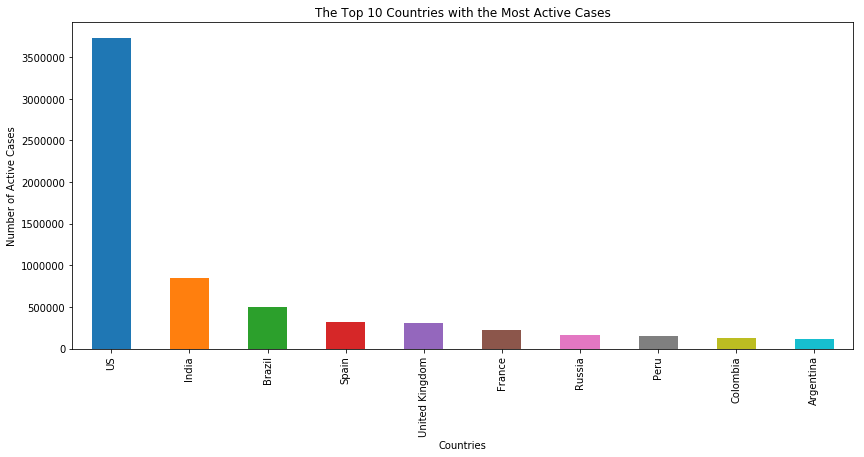

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

top_act_cases.plot.bar()

# Creates labels
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Active Cases')
# Sets the plot title
ax.set_title("The Top 10 Countries with the Most Active Cases")
plt.savefig('active_cases.png', dpi=300, bbox_inches='tight')
plt.show()

Active cases due to COVID-19 are people who currently have the disease, thus they have not recovered yet. This is derived by substrating the total number of deaths from the total number of cases. The US has the highest number of active cases of 3.7 Million. 

# Most Affected States 

In [15]:
# Droping missing values in the states
covid_df = covid_df.dropna()

In [16]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 8 to 743
Data columns (total 6 columns):
Province_State    576 non-null object
Country_Region    576 non-null object
Confirmed         576 non-null int64
Recovered         576 non-null int64
Deaths            576 non-null int64
Active            576 non-null int64
dtypes: int64(4), object(2)
memory usage: 31.5+ KB


### Most Affected States in USA

In [17]:
US_ = covid_df[covid_df["Country_Region"] == "US"]
US_.head()

,Province_State,Country_Region,Confirmed,Recovered,Deaths,Active
684,Mississippi,US,85939,0,2558,83381
685,Grand Princess,US,103,0,3,100
686,Oklahoma,US,62040,0,846,61194
687,Delaware,US,17752,0,606,17146
688,Minnesota,US,78966,0,1899,77067


In [18]:
US = US_.groupby(["Province_State" ])["Deaths"].max().sort_values(ascending=False).head(10)
US

Province_State
New York         32982
New Jersey       15978
California       13648
Texas            13426
Florida          11750
Massachusetts     9100
Illinois          8362
Pennsylvania      7735
Michigan          6798
Georgia           5931
Name: Deaths, dtype: int64

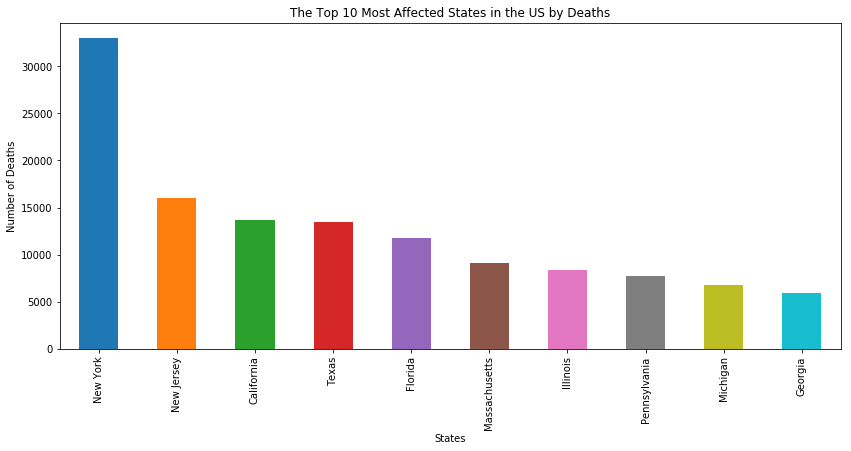

In [19]:
fig, ax = plt.subplots(figsize=(14, 6))

US.plot.bar()

# Creates labels
ax.set_xlabel('States')
ax.set_ylabel('Number of Deaths')
# Sets the plot title
ax.set_title("The Top 10 Most Affected States in the US by Deaths")
plt.savefig('US_states.png', dpi=300, bbox_inches='tight')
plt.show()

The figure above depicts the top 10 states in the US that are mostly affected by deaths due to COVID-19. These states are New York, New Jersey, California, Texas, Florida, Massachusetts, Illinois, Pennsyvania, Michigan and Georgia. 

### Most Affected States in Brazil

In [20]:
Brazil_ = covid_df[covid_df["Country_Region"] == "Brazil"]

In [21]:
Brazil_.head()

,Province_State,Country_Region,Confirmed,Recovered,Deaths,Active
30,Acre,Brazil,25249,19695,623,4931
31,Alagoas,Brazil,80103,75498,1917,2688
32,Amapa,Brazil,44454,32404,670,11380
33,Amazonas,Brazil,123187,104526,3841,14820
34,Bahia,Brazil,268137,250309,5590,12238


In [22]:
Brazil = Brazil_.groupby(["Province_State" ])["Deaths"].max().sort_values(ascending=False).head(10)
Brazil.head()

Province_State
Sao Paulo         31091
Rio de Janeiro    16467
Ceara              8555
Pernambuco         7619
Para               6228
Name: Deaths, dtype: int64

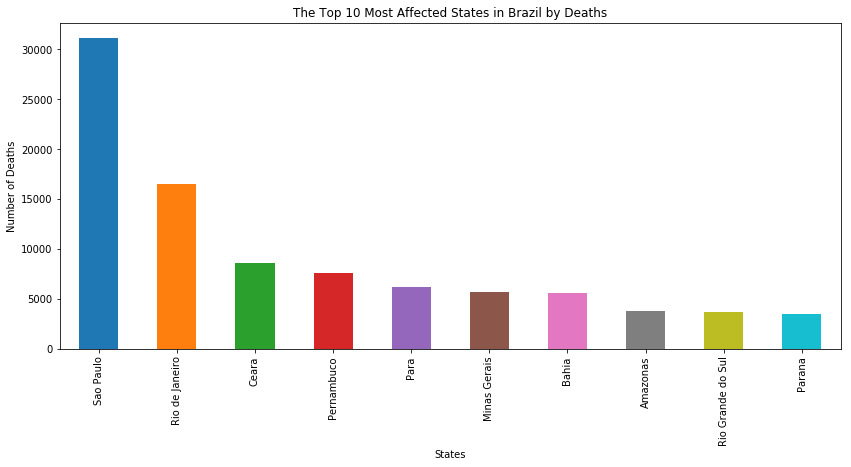

In [23]:
fig, ax = plt.subplots(figsize=(14, 6))

Brazil.plot.bar()

# Creates labels
ax.set_xlabel('States')
ax.set_ylabel('Number of Deaths')
# Sets the plot title
ax.set_title("The Top 10 Most Affected States in Brazil by Deaths")
plt.savefig('Brazil_states.png', dpi=300, bbox_inches='tight')
plt.show()

The most affected states in Brazil by deaths are Sao Paulo followed by Rio de Janeiro, Ceara and Pernambuco.

### Most Affected States in India

In [24]:
India_ = covid_df[covid_df["Country_Region"] == "India"]
India_.head()

,Province_State,Country_Region,Confirmed,Recovered,Deaths,Active
233,Andaman and Nicobar Islands,India,3257,2863,49,345
234,Andhra Pradesh,India,476506,370163,4276,102067
235,Arunachal Pradesh,India,4775,3280,7,1488
236,Assam,India,121224,92720,345,28159
237,Bihar,India,144104,126371,701,17032


In [25]:
India = India_.groupby(["Province_State" ])["Deaths"].max().sort_values(ascending=False).head(10)
India.head()

Province_State
Maharashtra       25964
Tamil Nadu         7687
Karnataka          6170
Delhi              4513
Andhra Pradesh     4276
Name: Deaths, dtype: int64

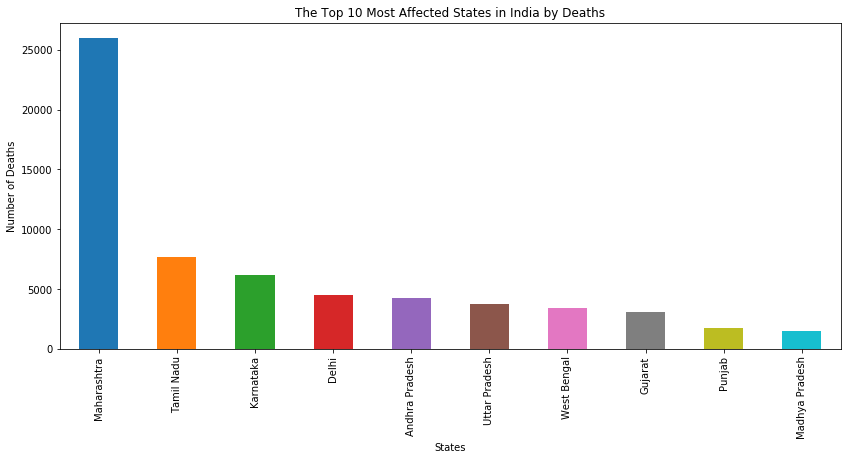

In [26]:
fig, ax = plt.subplots(figsize=(14, 6))

India.plot.bar()

# Creates labels
ax.set_xlabel('States')
ax.set_ylabel('Number of Deaths')
# Sets the plot title
ax.set_title("The Top 10 Most Affected States in India by Deaths")
plt.savefig('India_states.png', dpi=300, bbox_inches='tight')
plt.show()

The most affected states in Brazil by deaths are Maharashtra, Tamil Nadu, Karnataka, Delhi and Andhra Pradesh.

### Most Affected States in Russia

In [27]:
#Filtering the countries
Russia_ = covid_df[covid_df["Country_Region"] == "Russia"]
Russia_.head()

,Province_State,Country_Region,Confirmed,Recovered,Deaths,Active
476,Adygea Republic,Russia,3480,2964,29,487
477,Altai Krai,Russia,12033,10820,123,1090
478,Altai Republic,Russia,2252,1945,8,299
479,Amur Oblast,Russia,3537,3119,47,371
480,Arkhangelsk Oblast,Russia,11131,9222,254,1655


In [28]:
Russia = Russia_.groupby(["Province_State" ])["Deaths"].max().sort_values(ascending=False).head(10)
Russia.head()

Province_State
Moscow               4878
Saint Petersburg     2522
Moscow Oblast        1213
Dagestan Republic     507
Krasnoyarsk Krai      501
Name: Deaths, dtype: int64

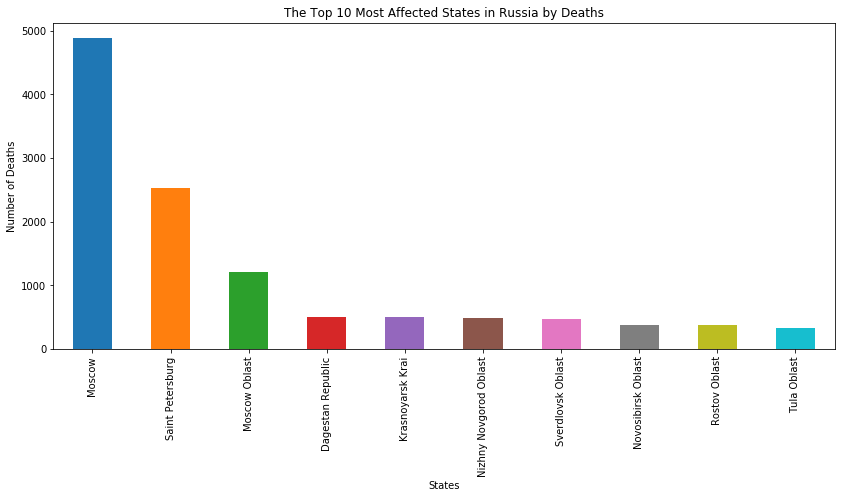

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))

Russia.plot.bar()

# Creates labels
ax.set_xlabel('States')
ax.set_ylabel('Number of Deaths')
# Sets the plot title
ax.set_title("The Top 10 Most Affected States in Russia by Deaths")
plt.savefig('Russia_states.png', dpi=300, bbox_inches='tight')
plt.show()

The states within Russia that recorded the most deaths due to COVID-19 are Moscow, Saint Petersburg, Moscow Oblast, Dagestan Republic and Krasnoyarsk Krai.